## import libs

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
from matplotlib.dates import DateFormatter
import plotly.express as px

/Users/jonatanbuga/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Data Preparation and Exploration / EDA

In [16]:
df = pd.read_csv('Tavily Data Analysis Home Test - Time Series.csv')
print(df.head())

             DATE_TIME  VOLUME  RESP_AVG
0   2025-03-22 8:00:00     442  7.085964
1   2025-03-22 9:00:00     418  8.405124
2  2025-03-22 11:00:00     507  7.779719
3  2025-03-22 12:00:00     559  6.877425
4  2025-03-22 13:00:00     602  8.178685


In [17]:
#Understanding the data 
df = df.set_index('DATE_TIME')
df.index = pd.to_datetime(df.index)
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1706 entries, 2025-03-22 08:00:00 to 2025-06-15 07:00:00
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   VOLUME    1706 non-null   int64  
 1   RESP_AVG  1706 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 40.0 KB
None
             VOLUME     RESP_AVG
count   1706.000000  1706.000000
mean    2640.644197     7.848615
std     2410.114417     2.171984
min      362.000000     4.594024
25%     1136.000000     6.904281
50%     2052.500000     7.694853
75%     3297.000000     8.506829
max    23259.000000    64.354239


/var/folders/sh/3c77gz0j55vb45wgw4_kj4xr0000gn/T/ipykernel_51916/1434365241.py:2: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



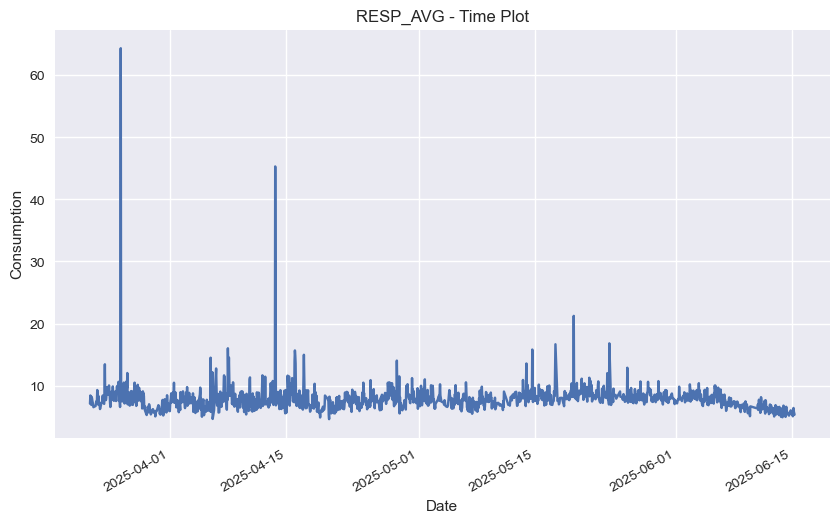

In [ ]:
# Set pyplot style
plt.style.use("seaborn")
# Plot for RESP_AVG
plt.figure(figsize=(10,6))
df['RESP_AVG'].plot(title='RESP_AVG - Time Plot')
plt.ylabel('Consumption')
plt.xlabel('Date')
plt.show()


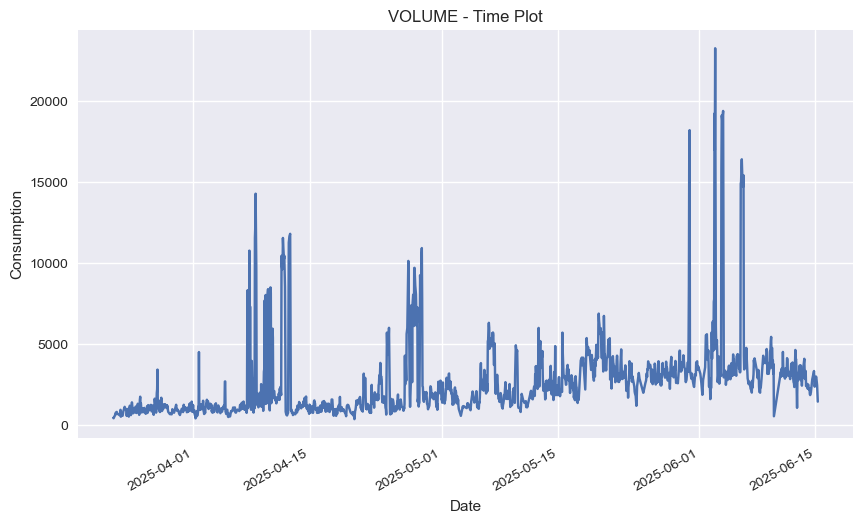

In [19]:
# Plot for volume
plt.figure(figsize=(10,6))
df['VOLUME'].plot(title='VOLUME - Time Plot')
plt.ylabel('Consumption')
plt.xlabel('Date')
plt.show()

In [20]:
# Extracting time-related features

df['year'] = df.index.year
df['month'] = df.index.month
df.reset_index(inplace=True)
df['week'] = df['DATE_TIME'].dt.isocalendar().week
df['hour'] = df['DATE_TIME'].dt.hour
df['day'] = df['DATE_TIME'].dt.dayofweek
df['day_str'] = df['DATE_TIME'].dt.strftime('%a')
df['year_month'] = df['DATE_TIME'].dt.strftime('%Y_%m')
df.set_index('DATE_TIME', inplace=True)

In [21]:
df.head()

,VOLUME,RESP_AVG,year,month,week,hour,day,day_str,year_month
DATE_TIME,,,,,,,,,
2025-03-22 08:00:00,442,7.085964,2025,3,12,8,5,Sat,2025_03
2025-03-22 09:00:00,418,8.405124,2025,3,12,9,5,Sat,2025_03
2025-03-22 11:00:00,507,7.779719,2025,3,12,11,5,Sat,2025_03
2025-03-22 12:00:00,559,6.877425,2025,3,12,12,5,Sat,2025_03
2025-03-22 13:00:00,602,8.178685,2025,3,12,13,5,Sat,2025_03


## An interim summary of what our data looks like and what we have in it:
- **DATE_TIME** :
Indicates the date and time of the measurement. In this time series, it will serve as the index metric
- **VOLUME** : 
The number of requests (traffic) that the system received in this time period. Very high or low values ​​relative to the average can indicate an abnormal load or an unexpected drop in activity
- **RESP_AVG** : 
The average response time of the system for all requests in that time period

## Seasonal Plots- RESP_AVG

/var/folders/sh/3c77gz0j55vb45wgw4_kj4xr0000gn/T/ipykernel_51916/1001326588.py:8: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



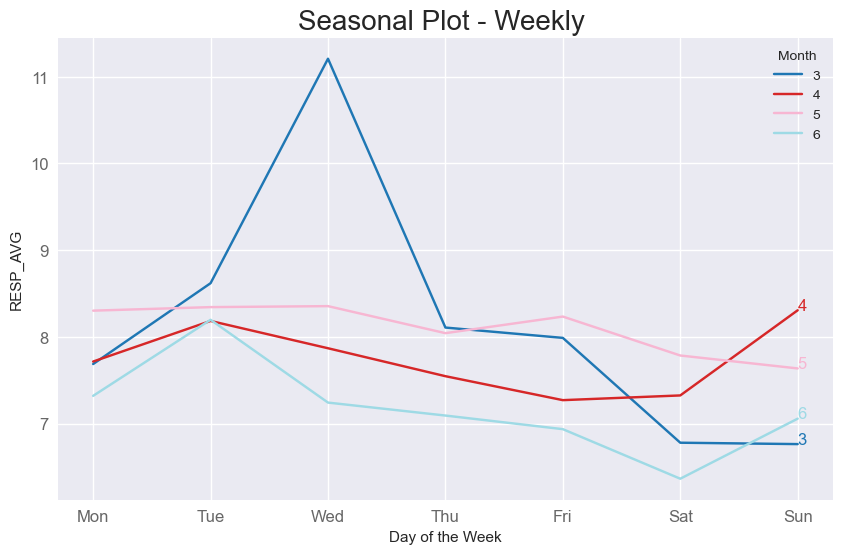

In [ ]:
#weekly seasonal plot
np.random.seed(42)
df_plot = df[['month', 'day_str', 'RESP_AVG', 'day']].dropna()
df_plot = df_plot.groupby(['day_str', 'month', 'day']).mean()[['RESP_AVG']].reset_index()
df_plot = df_plot.sort_values(by='day', ascending=True)

# Defining the color palette
months = df_plot['month'].unique()
colors = plt.cm.get_cmap('tab20', len(months)).colors  # Using a colormap from matplotlib

# Plotting
plt.figure(figsize=(10, 6))
for i, month in enumerate(months):
    month_data = df_plot[df_plot['month'] == month]
    plt.plot(month_data['day_str'], month_data['RESP_AVG'], color=colors[i], label=month)
    plt.text(len(month_data['day_str']) - 1, month_data['RESP_AVG'].iloc[-1], month, fontsize=12, color=colors[i])

# Setting labels and titles
plt.xlabel('Day of the Week')
plt.ylabel('RESP_AVG')
plt.title('Seasonal Plot - Weekly ', fontsize=20)
plt.xticks(fontsize=12, alpha=0.7)
plt.yticks(fontsize=12, alpha=0.7)
plt.legend(title='Month')
plt.show()

### insights from seasonal plot of RESP_AVG by months
* The graph shows how the average response time is affected during a full week over the four months the index was taken.
At first glance, the main difference is that the average response time of the system is usually between 7 and 8.5, but there is a major anomaly in the third month towards the middle of the week.

* The anomaly found in the graph can point to the conclusion that at the beginning/middle of the week, the traffic generated in the system probably causes a greater increase in the response time of the system at that given time.

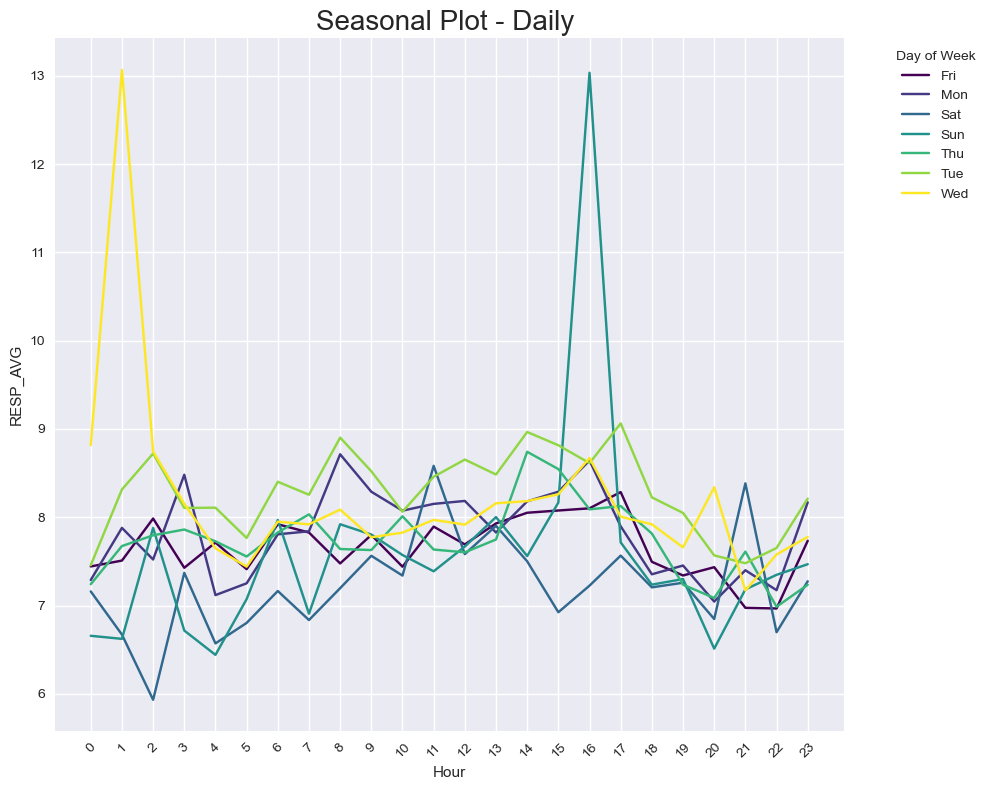

In [28]:
#dayly seasonal plot
df_plot = df[['hour', 'day_str', 'RESP_AVG']].dropna()
df_plot = df_plot.groupby(['hour', 'day_str']).mean().reset_index()

# Plotting using Matplotlib directly
plt.figure(figsize=(10, 8))
days = df_plot['day_str'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(days)))

for i, day in enumerate(days):
    day_data = df_plot[df_plot['day_str'] == day]
    plt.plot(day_data['hour'], day_data['RESP_AVG'], label=day, color=colors[i])

# Setting x-axis ticks
plt.xticks(ticks=range(0, 24), labels=[str(i) for i in range(24)], rotation=45)

# Setting labels and titles
plt.title("Seasonal Plot - Daily ", fontsize=20)
plt.ylabel('RESP_AVG')
plt.xlabel('Hour')
plt.legend(title='Day of Week', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### insights from seasonal plot of RESP_AVG by days
The graph shows us a daily layout in terms of hours (24 hours a day), telling us how at each hour of the day during different days of the week, the average response time of the system changes.

As can be seen, there are 2 main anomalies that occur at the beginning of the week and in the middle of the week (where this distribution is a direct derivative of the previous graph we presented).

The effect of the weekend (Sunday) and entering the weekend (Wednesday) creates major anomalies in the graph.
It can be seen that there is a significant anomaly in the late night hours of Sunday and also in the afternoon/evening hours of Wednesday. This could indicate a trend and a central pattern of influence in the average response time of the system, due to entering and exiting the weekend.

### 

## Seasonal Plots- VOLUME

/var/folders/sh/3c77gz0j55vb45wgw4_kj4xr0000gn/T/ipykernel_51916/1687452583.py:9: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



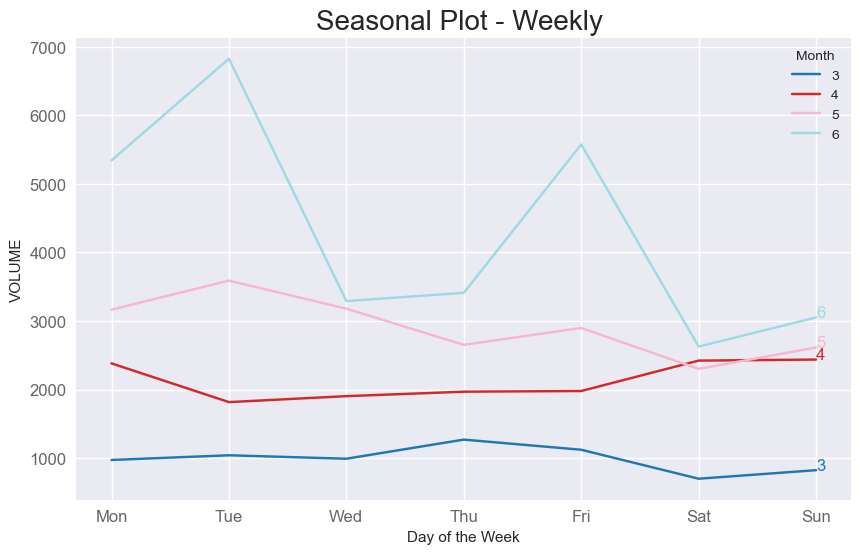

In [29]:
#weekly seasonal plot
np.random.seed(42)
df_plot = df[['month', 'day_str', 'VOLUME', 'day']].dropna()
df_plot = df_plot.groupby(['day_str', 'month', 'day']).mean()[['VOLUME']].reset_index()
df_plot = df_plot.sort_values(by='day', ascending=True)

# Defining the color palette
months = df_plot['month'].unique()
colors = plt.cm.get_cmap('tab20', len(months)).colors  # Using a colormap from matplotlib

# Plotting
plt.figure(figsize=(10, 6))
for i, month in enumerate(months):
    month_data = df_plot[df_plot['month'] == month]
    plt.plot(month_data['day_str'], month_data['VOLUME'], color=colors[i], label=month)
    plt.text(len(month_data['day_str']) - 1, month_data['VOLUME'].iloc[-1], month, fontsize=12, color=colors[i])

# Setting labels and titles
plt.xlabel('Day of the Week')
plt.ylabel('VOLUME')
plt.title('Seasonal Plot - Weekly ', fontsize=20)
plt.xticks(fontsize=12, alpha=0.7)
plt.yticks(fontsize=12, alpha=0.7)
plt.legend(title='Month')
plt.show()

### insights of seasonal plot- volume by month and weekly
The graph shows how the amount of requests/traffic volume received in the system is spread out on a weekly graph assuming that the months are spread out.
The peak and anomalies in the graph are seen mainly at the beginning of the week between Monday and Tuesday, and on Friday.

A key pattern that can be observed is the entry into the weekend and entry into the beginning of the week, which causes these anomalies to occur.
June is the unstable month in terms of the amount of requests/traffic volume received in the system.
The other months remain stable around 1000-3000

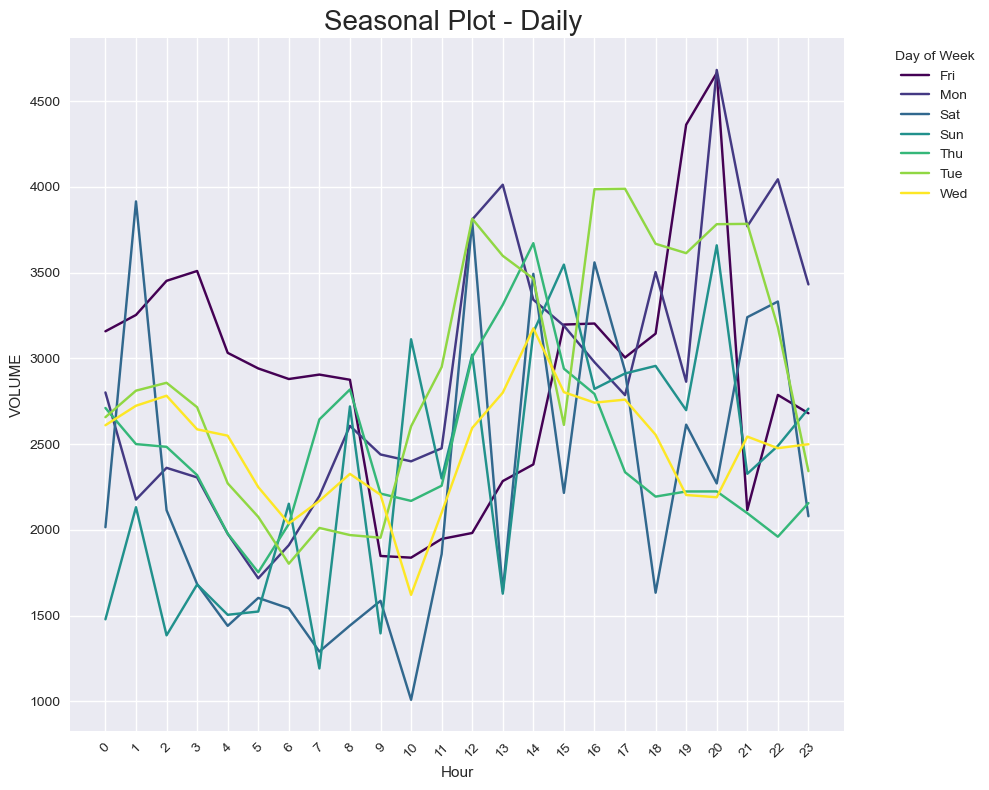

In [30]:
#dayly seasonal plot
df_plot = df[['hour', 'day_str', 'VOLUME']].dropna()
df_plot = df_plot.groupby(['hour', 'day_str']).mean().reset_index()

# Plotting using Matplotlib directly
plt.figure(figsize=(10, 8))
days = df_plot['day_str'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(days)))

for i, day in enumerate(days):
    day_data = df_plot[df_plot['day_str'] == day]
    plt.plot(day_data['hour'], day_data['VOLUME'], label=day, color=colors[i])

# Setting x-axis ticks
plt.xticks(ticks=range(0, 24), labels=[str(i) for i in range(24)], rotation=45)

# Setting labels and titles
plt.title("Seasonal Plot - Daily ", fontsize=20)
plt.ylabel('VOLUME')
plt.xlabel('Hour')
plt.legend(title='Day of Week', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### insights of seasonal plot- volume by hour and days
The graph shows how the number of requests received in the system is spread out over an hourly graph spread over 24 hours, in addition, days of the week are plotted in different colors on the daily graph.

If we divide the graph into segments, in the first 8 hours of the day from 00:00-8:00 we can see an anomaly above the average at the beginning of the night and an anomaly below the average after the morning hours (on the same day! Sunday). This effect is probably due to the end of the week and the beginning of a new week.

Another anomaly occurs on Mondays and Fridays (a derivative of entering and leaving the weekend), mainly in the evening hours 20:00-21:00, when the anomaly occurs above the average number of requests received in the system.

# box plots

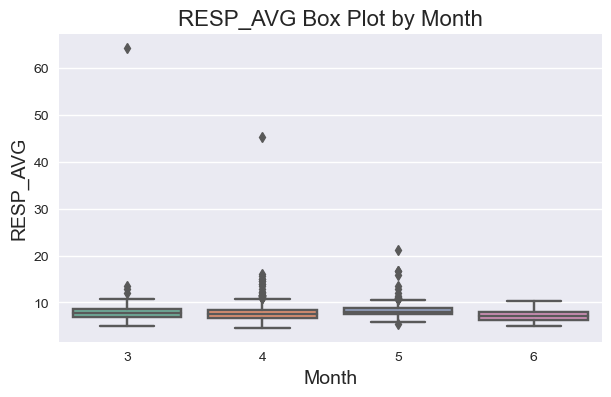

In [31]:
#resp_avg box plot
plt.figure(figsize=(7, 4))
sns.boxplot(x='month', y='RESP_AVG', data=df, palette='Set2')
plt.title('RESP_AVG Box Plot by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('RESP_AVG', fontsize=14)
plt.show()

### insights of box-plot - resp_avg by months
A box plot spread over the 4 months of data allows us to visually identify anomalies very easily and also understand the distribution of the data described in the excellent time series.

It can be seen that there are 2 major anomalies in the months of March and April. The average response time of the system to requests is distributed almost similarly in these months, but in each of these months there is a significant anomaly.

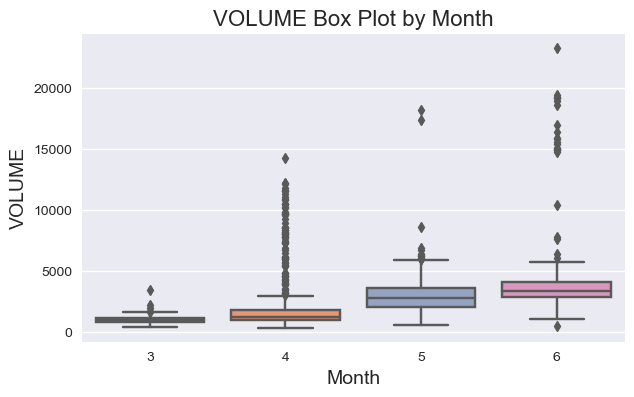

In [32]:
#volume box plot
plt.figure(figsize=(7, 4))
sns.boxplot(x='month', y='VOLUME', data=df, palette='Set2')
plt.title('VOLUME Box Plot by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('VOLUME', fontsize=14)
plt.show()

### insights of box plot - volume
Box plot spread over the 4 months depicting the distribution of the volume column data.
The distribution of the data in each month except March is generally uneven and there are many outliers. Whether it is above the maximum or below the minimum.

A key emphasis that can be analyzed from the above plot is that as we progress through the months on the graph, the outliers are distributed unevenly, especially in June, where a distribution can also be seen below the minimum.

## Feature Engineering
- Normalization and consideration of the relationship between the metrics

In [34]:
df['log_VOLUME'] = np.log(df['VOLUME'])
df['resp_per_logreq'] = df['RESP_AVG'] / df['log_VOLUME']


df['z_resp_per_logreq'] = (
    df['resp_per_logreq'] - df['resp_per_logreq'].mean()
) / df['resp_per_logreq'].std()


In [35]:
df.head()

,VOLUME,RESP_AVG,year,month,week,hour,day,day_str,year_month,log_VOLUME,resp_per_logreq,z_resp_per_logreq
DATE_TIME,,,,,,,,,,,,
2025-03-22 08:00:00,442,7.085964,2025,3,12,8,5,Sat,2025_03,6.091310,1.163291,0.401740
2025-03-22 09:00:00,418,8.405124,2025,3,12,9,5,Sat,2025_03,6.035481,1.392619,1.133420
2025-03-22 11:00:00,507,7.779719,2025,3,12,11,5,Sat,2025_03,6.228511,1.249050,0.675357
2025-03-22 12:00:00,559,6.877425,2025,3,12,12,5,Sat,2025_03,6.326149,1.087142,0.158785
2025-03-22 13:00:00,602,8.178685,2025,3,12,13,5,Sat,2025_03,6.400257,1.277868,0.767304


## Visualize data and identify anomalies by setting a fixed threshold

Assuming we normalized the VOLUME column by taking it logarithmically, and created a new feature that relies on the relationship between VOLUME and resp . We use the zscore calculation to highlight the points outside the chosen threshold, each such point is a potential anomaly.

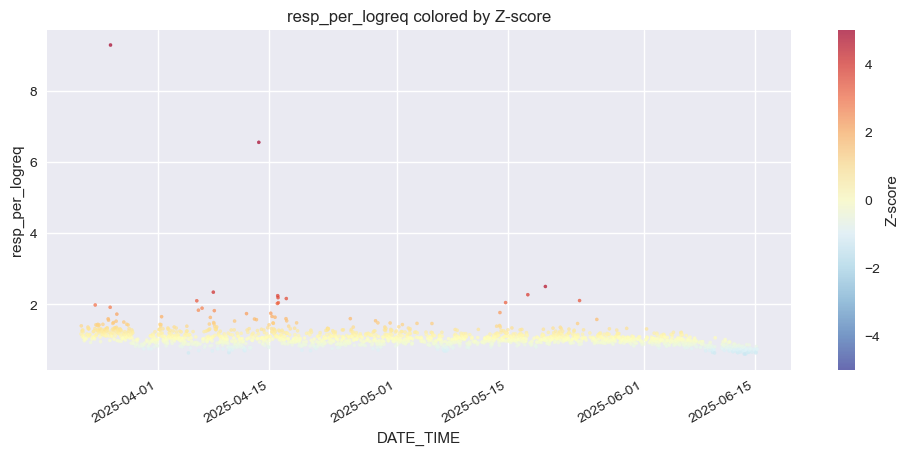

In [ ]:
# Plotting resp_per_logreq colored by Z-score
plt.figure(figsize=(12,5))
sc = plt.scatter(df.index, df['resp_per_logreq'],
                 c=df['z_resp_per_logreq'],
                 cmap='RdYlBu_r', vmin=-5, vmax=5, s=5, alpha=0.7)
plt.colorbar(sc, label='Z-score')
plt.title('resp_per_logreq colored by Z-score')
plt.xlabel('DATE_TIME')
plt.ylabel('resp_per_logreq')
plt.gcf().autofmt_xdate()
plt.show()